<a href="https://colab.research.google.com/github/Sonyalina/ml-/blob/main/online_retails%20and%20bank_/Customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1: Customer Segmentation and Revenue Prediction for an Online Retail


In [12]:
import numpy as np
import pandas as pd

In [13]:
retail=pd.read_excel(r"/Online Retail.xlsx")
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
retail.shape

(541909, 8)

In [16]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Data Preprocessing


In [18]:
retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [19]:
# Droping the null values..
retail=retail.dropna()
retail.shape

(406829, 8)

In [20]:
# changing datatype of customerID
retail['CustomerID']=retail['CustomerID'].astype(str)

<ipython-input-20-7d865d439a38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['CustomerID']=retail['CustomerID'].astype(str)


In [21]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


Feature Engineering:


In [22]:
#TotalAmount
retail['TotalAmount']=retail['Quantity']*retail['UnitPrice']
monetary=retail.groupby('CustomerID')['TotalAmount'].sum()
monetary=monetary.reset_index()
monetary.head()

<ipython-input-22-876429c3cdda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['TotalAmount']=retail['Quantity']*retail['UnitPrice']


,CustomerID,TotalAmount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [23]:
# Recent Purchases
recent_purchase=retail.groupby('CustomerID')['InvoiceDate'].max()
recent_purchase=recent_purchase.reset_index()
recent_purchase.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [24]:
# Frequency by each customer.
frequency=retail.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [25]:
# recency
import datetime as dt
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'])
max_date=max(retail['InvoiceDate'])
max_date

<ipython-input-25-49f6b24533ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'])


Timestamp('2011-12-09 12:50:00')

In [26]:
#diff between max_date and transaction date
retail['Diff']=(max_date-retail['InvoiceDate']).dt.days
retail.head()

<ipython-input-26-87af60927257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Diff']=(max_date-retail['InvoiceDate']).dt.days


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [27]:
#recency of customer
recency=retail.groupby('CustomerID')['Diff'].min()
recency=recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [28]:
rfm=recency.merge(frequency,on='CustomerID',how='inner')
rfm=rfm.merge(monetary,on='CustomerID',how='inner')
rfm.columns=['CustomerID','Recency','Frequency','Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


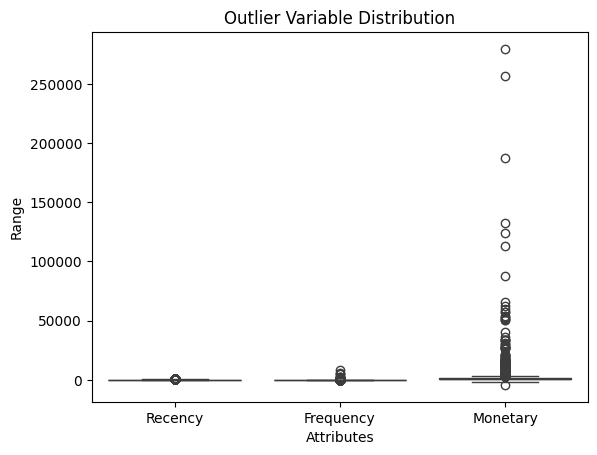

In [29]:
# outliers analysis
import seaborn as sns
import matplotlib.pyplot as plt
attributes = ['Recency', 'Frequency', 'Monetary']
sns.boxplot(data=rfm[attributes])
plt.title('Outlier Variable Distribution')
plt.ylabel("Range")
plt.xlabel("Attributes")
plt.show()

Remove Outliers

In [30]:
#Remove Outliers of monetary:
q1=rfm['Monetary'].quantile(0.05)
q3=rfm['Monetary'].quantile(0.75)
iqr=q3-q1
rfm=rfm[(rfm['Monetary']>=q1-1.5*iqr) & (rfm['Monetary']<=q3+1.5*iqr)]
#Remove Outliers of recency:
q1=rfm['Recency'].quantile(0.05)
q3=rfm['Recency'].quantile(0.75)
iqr=q3-q1
rfm=rfm[(rfm['Recency']>=q1-1.5*iqr) & (rfm['Recency']<=q3+1.5*iqr)]
#Remove Outliers of frequency:
q1=rfm['Frequency'].quantile(0.05)
q3=rfm['Frequency'].quantile(0.75)
iqr=q3-q1
rfm=rfm[(rfm['Frequency']>=q1-1.5*iqr) & (rfm['Frequency']<=q3+1.5*iqr)]


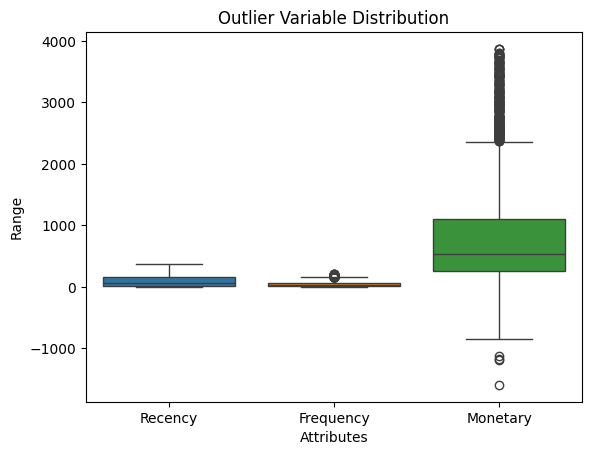

In [31]:
attributes = ['Recency', 'Frequency', 'Monetary']
sns.boxplot(data=rfm[attributes])
plt.title('Outlier Variable Distribution')
plt.ylabel("Range")
plt.xlabel("Attributes")
plt.show()

Exploratory Data Analysis (EDA)

<ipython-input-32-b498d45211f3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'],bins=50)
<ipython-input-32-b498d45211f3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'],bins=100)
<ipython-input-32-b498d45211f3>:11: Use

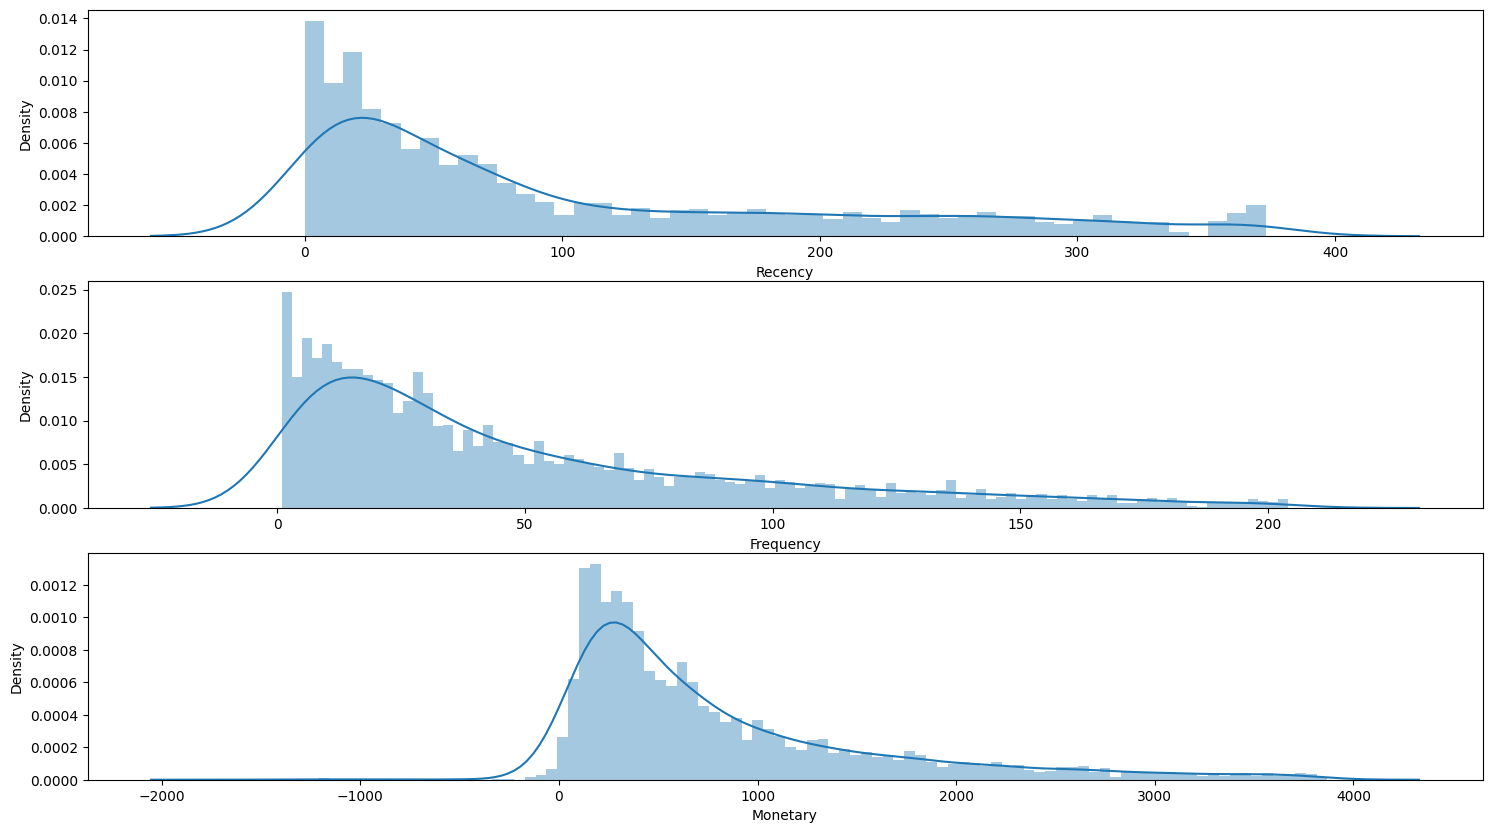

In [32]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(18,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'],bins=50)

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'],bins=100)

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm['Monetary'],bins=100)

plt.show()

In [33]:
rfm_df=rfm[['Monetary','Frequency','Recency']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(3789, 3)

In [34]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['Monetary','Frequency','Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-1.016354,-1.038633,2.163491
1,1.229487,-0.406286,-0.267334
2,1.179890,0.509528,-0.809669
3,-0.598486,-0.711557,2.008538
4,0.914799,0.989239,-0.645032


<ipython-input-35-c0a0d60604d8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm_df_scaled['Recency'])
<ipython-input-35-c0a0d60604d8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(rfm_df_scaled['Frequency'])
<ipython-input-35-c0a0d60604d8>:10: 

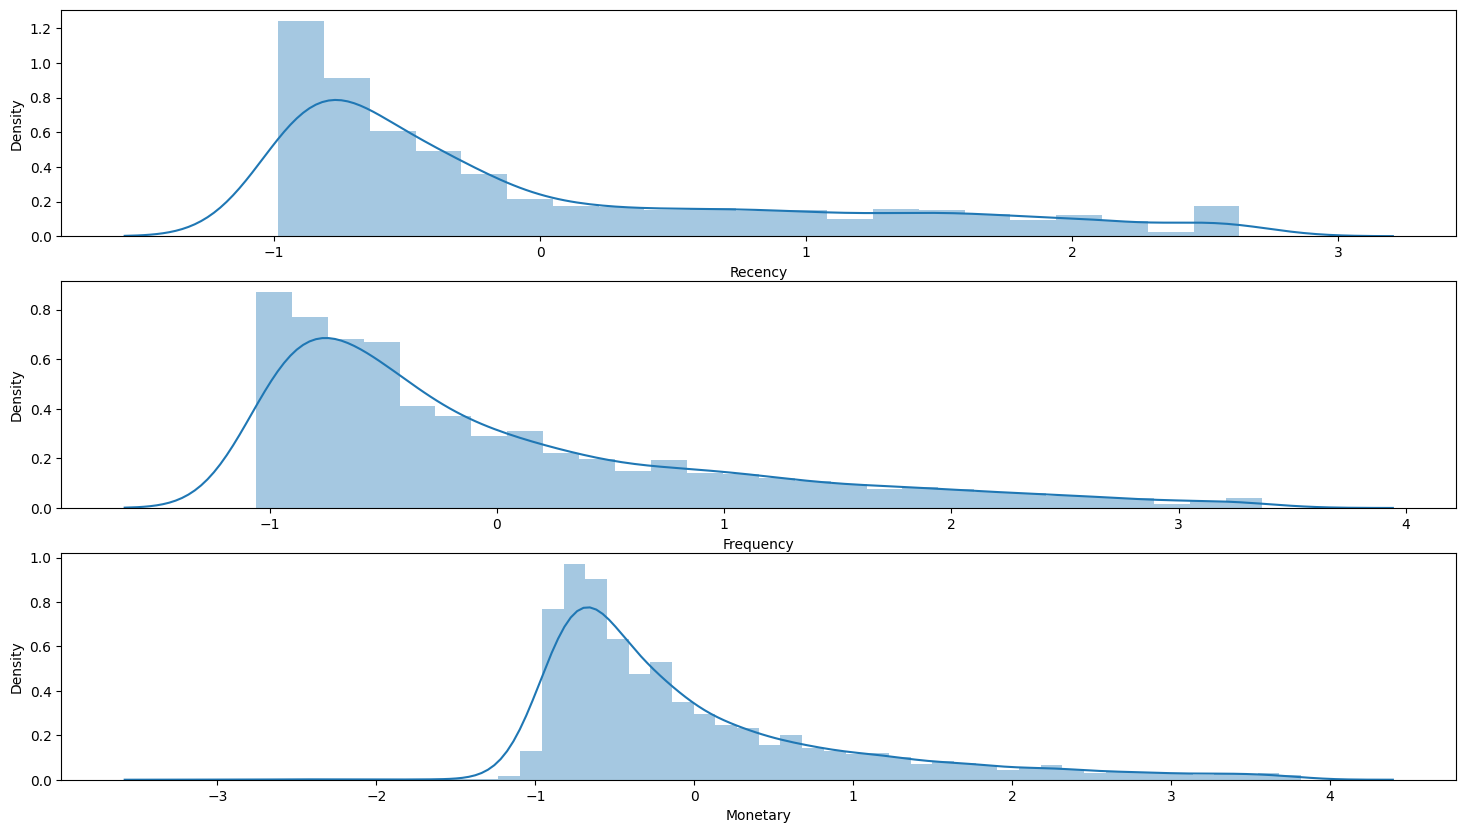

In [35]:
plt.figure(figsize=(18,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm_df_scaled['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm_df_scaled['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm_df_scaled['Monetary'])

# Show the plot
plt.show()

Implementing K means

In [36]:
from sklearn.cluster import KMeans

In [37]:
inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(rfm_df_scaled)
    inertia.append(kmeans.inertia_)

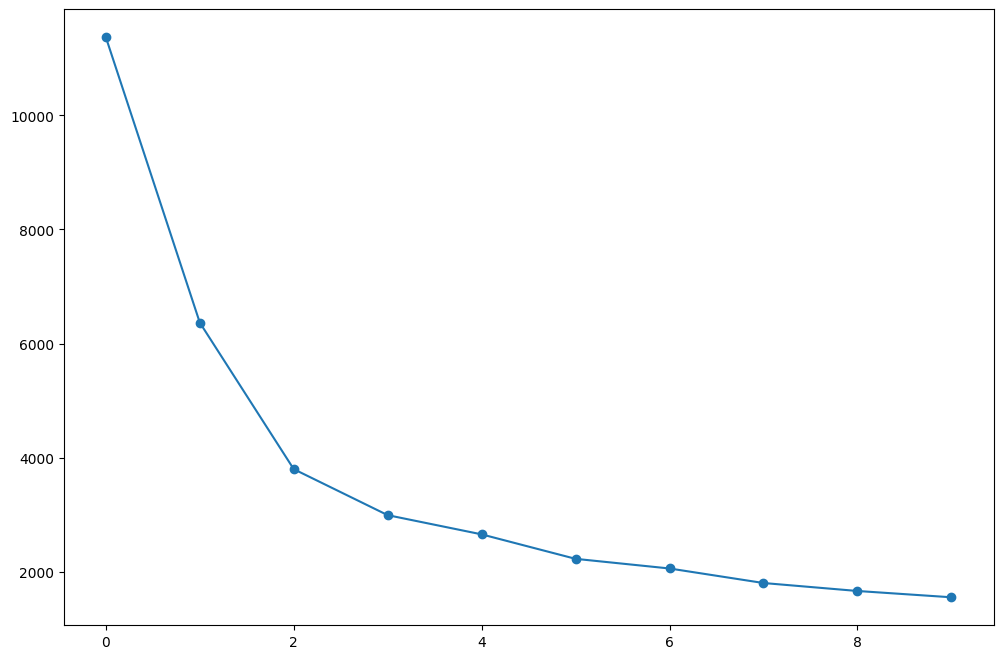

In [38]:
plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o");

In [39]:
#Elbow seems to be at n=3

kmeans=KMeans(n_clusters=3)
kmeans.fit(rfm_df_scaled)
rfm["Clusters"]=(kmeans.labels_+1)
rfm

,CustomerID,Recency,Frequency,Monetary,Clusters
0,12346.0,325,2,0.00,3
2,12348.0,74,31,1797.24,1
3,12349.0,18,73,1757.55,2
4,12350.0,309,17,334.40,3
5,12352.0,35,95,1545.41,2
...,...,...,...,...,...
4366,18278.0,73,9,173.90,1
4367,18280.0,277,10,180.60,3
4368,18281.0,180,7,80.82,3
4369,18282.0,7,13,176.60,1


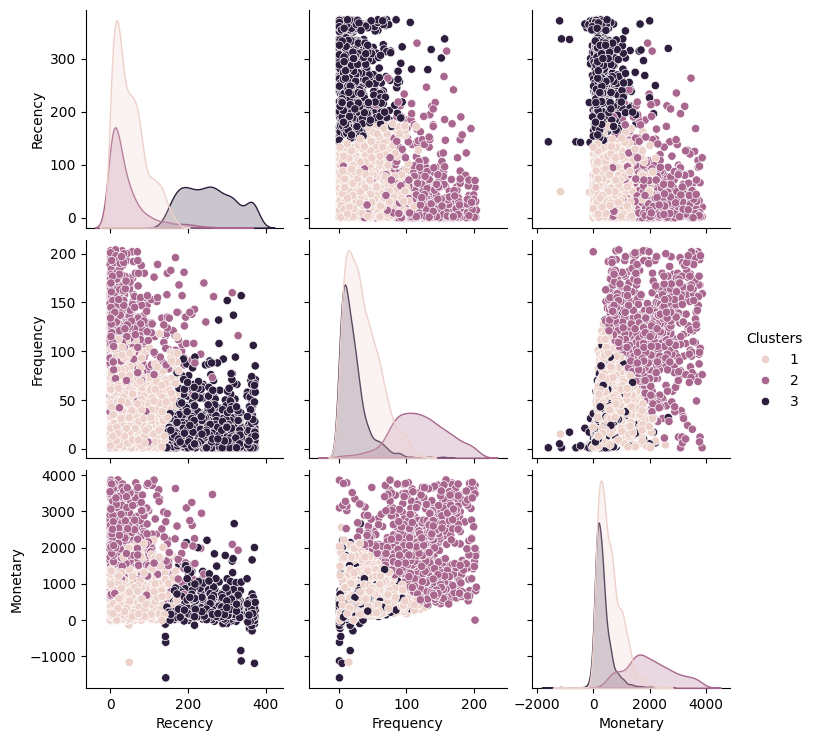

In [40]:
sns.pairplot(rfm,hue="Clusters")

## ***Project 2: Customer Conversion Prediction for a Banking Campaign***

In [41]:
bank=pd.read_csv(r"/bank.csv",sep=";")
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [59]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4521 non-null   int64  
 1   job                 4521 non-null   object 
 2   marital             4521 non-null   object 
 3   education           4521 non-null   object 
 4   default             4521 non-null   object 
 5   balance             4521 non-null   int64  
 6   housing             4521 non-null   object 
 7   loan                4521 non-null   object 
 8   contact             4521 non-null   object 
 9   day                 4521 non-null   int64  
 10  month               4521 non-null   object 
 11  duration            4521 non-null   int64  
 12  campaign            4521 non-null   int64  
 13  pdays               4521 non-null   int64  
 14  previous            4521 non-null   int64  
 15  poutcome            4521 non-null   object 
 16  y     

In [43]:
bank.shape

(4521, 17)

In [44]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [45]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [46]:
bank.duplicated().sum()

0

Exploratory Data Analysis

In [47]:
#Exploratory Data Analysis
bank["y"].value_counts()

,count
y,
no,4000
yes,521


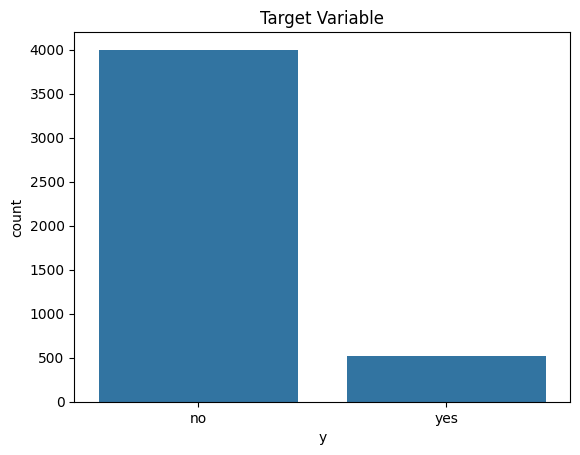

In [48]:
sns.countplot(x="y", data=bank)
plt.title("Target Variable")
plt.show()

In [49]:
#, age_campaign_ratio = age / number of contacts.
bank["age_campaign_ratio"] = bank["age"] / bank["campaign"]
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_campaign_ratio
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,30.0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,33.0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,35.0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,7.5
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,59.0


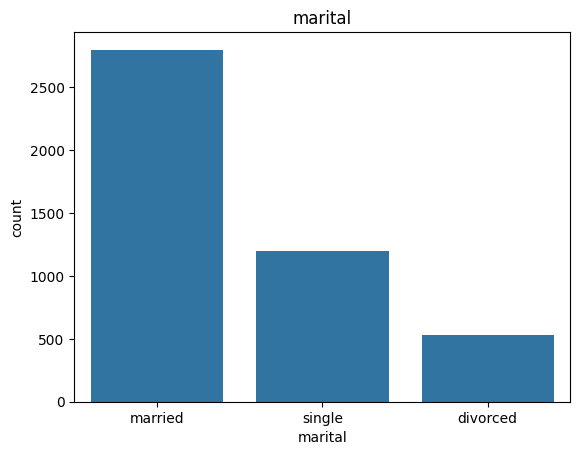

In [50]:
sns.countplot(x="marital", data=bank )
plt.title("marital")
plt.show()

In [51]:
bank['marital'].value_counts()

,count
marital,
married,2797
single,1196
divorced,528


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
X= bank.drop(['y'],axis=1)
Y= bank['y']


In [54]:
print(X)
print(Y)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [62]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_campaign_ratio'],
      dtype='object')

In [66]:
!pip install scikit-learn pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Assuming 'bank' is your DataFrame
X = bank.drop(['y'], axis=1)
Y = bank['y']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output

# Fit the encoder on the categorical columns and transform them
categorical_cols = X.select_dtypes(include=['object']).columns
encoded_data = encoder.fit_transform(X[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and concatenate the encoded DataFrame
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Now you can split and train your model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter for better convergence
lr_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

log_reg_y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(Y_test, log_reg_y_pred_prob)

In [68]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [79]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, Y_train)
predicted = rf_model.predict(X_test)


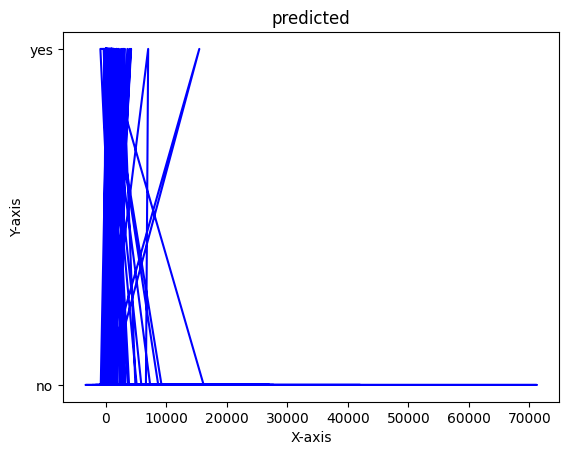

In [94]:
plt.plot(X_test, predicted, color = 'blue')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("predicted")
plt.show()